In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Phân tích dữ liệu/Data/rawdata.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


- DiaChi: địa chỉ của chung cư, ở thành phố Hồ Chí Minh
- inhTrangBDS: là chung cư này đã bàn giao chưa, hay vẫn còn đang trong quá trìnhg xây dựng.
- DienTich: diện tích thực ở(sử dụng) trên sổ hồng, đơn vị: triệu/m2.
PhongNgu: số lượng phòng ngủ.
- TenPhanKhu: căn hộ đó thuộc block nào trong khu chung cư ấý. Vì 1 khu chung cư có rất nhiều block, các block ở vị trí khác nhau sẽ có giá khác nhau.
- SoTang: căn hộ nằm ở tầng thứ mấy.
- PhongTam: số lượng nhà vệ sinh.
- Loại: chung cư hay nhà ở xã hội.
- GiayTo: giấy tờ pháp lý của căn hộ, có đang tranh chấp hay không, có hợp pháp hay không.
- MaCanHo: mã căn hộ (giống như số nhà).
- TinhTrangNoiThat: căn hộ đã có nội thất hay chưa(sofa, lò vi sóng, máy lạnh,...).
- HuongCuaChinh: hướng cửa chính của căn hộ.
- HuongBanCong: hướng ban công của căn hộ.
- DacDiem: Đặc điểm căn hộ ( căn trong góc, hay căn chính giữa,...).
- Gia: giá bán của căn hộ.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24949 entries, 0 to 24948
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24949 non-null  object 
 1   TinhTrangBDS      24924 non-null  object 
 2   DienTich          24917 non-null  object 
 3   Gia/m2            24916 non-null  object 
 4   Phongngu          24926 non-null  object 
 5   TenPhanKhu        7035 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24926 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12790 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5601 non-null   object 
 15  Gia               24949 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

Dữ liệu sau khi thu thập được bao gồm 24949 dòng. Ở đây dữ liệu thiếu khá nhiều, và sẽ có một số cột không ảnh hưởng đến output giá chung cư

# 1. xử lý dữ liệu

In [ ]:
## lấy những data có dữ liệu về diện tích
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]
## Có thể thấy 2 trường dữ liệu Gia/m2 và Gia tương đương nhau nên sẽ xóa trường này đi
del df1["Gia/m2"]

In [ ]:
## lấy những data có dữ liệu về phòng ngủ
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

In [ ]:
## chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]

del df3['level_0']
del df3['index']
df4 = df3[df3.Loai.notnull()]

In [ ]:
## truc quan truong gia tri Gia
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]

In [ ]:
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
df4 = df4.reset_index()

In [ ]:
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [ ]:
df4.Quan.unique()

array([' Quận 7', ' Quận Bình Tân', ' Quận Tân Bình', ' Quận 6',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh',
       ' Huyện Hóc Môn', ' Quận Thủ Đức', ' Quận 9', ' Quận 10',
       ' Huyện Nhà Bè', ' Quận 12', ' Quận Tân Phú', ' Quận 2',
       ' Quận Phú Nhuận', ' Quận 1', ' Quận 4', ' Quận 11', ' Quận 5',
       ' Quận Gò Vấp', ' Quận 3', ' Huyện Củ Chi'], dtype=object)

In [ ]:
frame = df4[['DiaChi','Quan','TinhTrangBDS','DienTich','Phongngu','TenPhanKhu','SoTang','PhongTam','Loai','GiayTo','MaCanHo'
             ,'TinhTrangNoiThat' ,'HuongCuaChinh','HuongBanCong','DacDiem',"Gia"]]
frame.head()

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2000000000.0
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95,3,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5300000000.0
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75,2,2,5.0,2,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2580000000.0
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70,1,A,7.0,1,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4000000000.0
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2950000000.0


In [ ]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float')
frame.PhongTam = frame.PhongTam.astype('float')
frame.Gia = frame.Gia.astype('float')
frame.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,24086.000000,24086.000000,6552.000000,24086.000000,2.408600e+04
mean,232.163841,2.052230,11.347222,1.754048,2.870769e+09
std,9943.563316,0.746907,15.322589,0.612478,7.898340e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


In [ ]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index) # drop những hàng có diện tích >500
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index) # drop những hàng có tầng > 81
frame['log_price'] = np.log(frame.USD)
#tại vì khi giữ những hàng có tầng 81 và diện tích 500 trở lên khi vẽ biểu đồ thể hiện giá rất cao chúng ta có thể làm cho phân tích của mình trở nên không chính xác hơn và  bị ảnh hưởng bởi các giá trị ngoại biên.
print("Số hàng sau khi làm sạch dữ liệu:",len(frame))

Số hàng sau khi làm sạch dữ liệu: 24019


Chỉ lấy các dòng dữ liệu có dữ liệu về: diện tích, phòng ngủ, phòng tắm và giá. Và đổi giá tiền từ VNĐ sang USD

In [ ]:
frame

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09,122917.0,11.719265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24373,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,B,19.0,1.0,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,2.100000e+09,87500.0,11.379394
24374,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,NaN,NaN,1.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,1.550000e+09,64583.0,11.075706
24375,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,115.0,2.0,A2,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,3.300000e+09,137500.0,11.831379
24376,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,2.650000e+09,110417.0,11.612019


Skew : -3.06


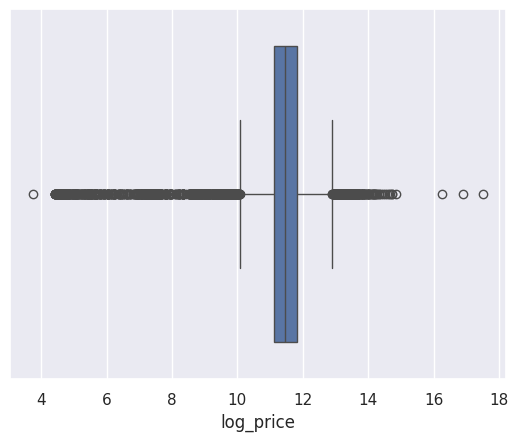

In [ ]:
print('Skew :', round(frame['log_price'].skew(), 2))
sns.boxplot(x = frame['log_price']);

In [ ]:
def iqr(col):
  q1 = np.quantile(col, 0.25)
  q3 = np.quantile(col, 0.75)
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)

  return lower,upper

In [ ]:
lower,upper = iqr(frame['log_price'])
frame = frame[(frame.log_price>lower) & (frame.log_price<upper)]

Skew : 0.01


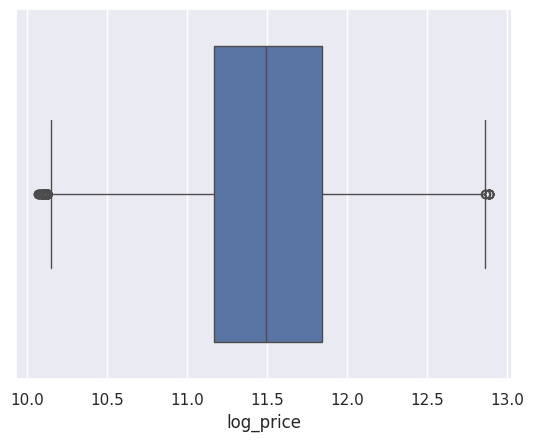

In [ ]:
print('Skew :', round(frame['log_price'].skew(), 2))
sns.boxplot(x = frame['log_price']);

# 2. Trực quan dữ liệu

Câu 1: Diện tích của các căn chung cư có ảnh hưởng đến giá hay không ?


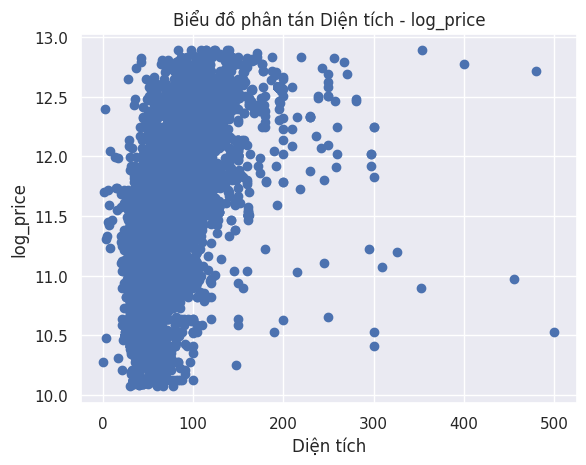

In [ ]:
# Lấy các giá trị của trường DienTich và log_price
dientich = frame['DienTich']
log_price = frame['log_price']

# Vẽ biểu đồ scatter
plt.scatter(dientich, log_price)
plt.xlabel('Diện tích')
plt.ylabel('log_price')
plt.title('Biểu đồ phân tán Diện tích - log_price')
plt.show()

- Dựa trên nhận xét từ biểu đồ phân tán Diện tích - log_price, ta có thể kết luận rằng diện tích căn hộ có ảnh hưởng đến giá chung cư. Biểu đồ cho thấy một mối quan hệ tương đối tuyến tính giữa diện tích và log_price, với diện tích lớn hơn thường đi kèm với log_price cao hơn.
=> Diện tích càng rộng thì giá càng tăng

câu 2: số tầng có ảnh hưởng gì đến giá trị hay không ?

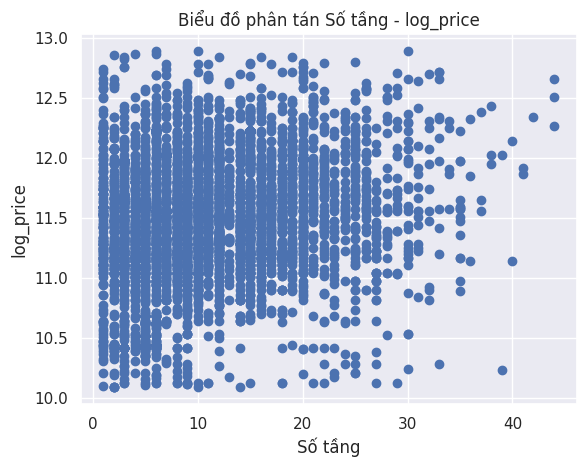

In [ ]:
# Lấy các giá trị của trường SoTang và log_price
sotang = frame['SoTang']
log_price = frame['log_price']

# Vẽ biểu đồ scatter
plt.scatter(sotang, log_price)
plt.xlabel('Số tầng')
plt.ylabel('log_price')
plt.title('Biểu đồ phân tán Số tầng - log_price')
plt.show()

Dựa trên biểu đồ phân tán Số tầng - log_price, ta có thể nhận thấy rằng không có một mối quan hệ tuyến tính rõ ràng giữa số tầng và log của giá chung cư. Các điểm trên biểu đồ phân tán không theo một hình dạng hoặc mô hình đặc trưng nào. Điều này cho thấy rằng số tầng không đơn giản là yếu tố quyết định duy nhất cho giá chung cư và có thể có nhiều yếu tố khác có ảnh hưởng đến giá.

câu 3 : số phòng ngủ có ảnh hưởng đến giá trị hay không?

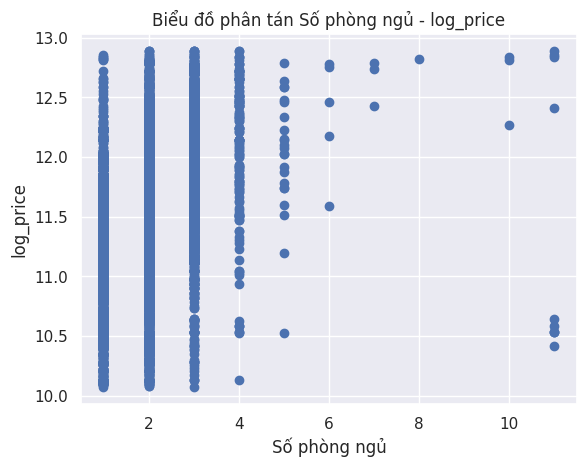

In [ ]:
# Lấy các giá trị của trường Phongngu và log_price
phongngu = frame['Phongngu']
log_price = frame['log_price']

# Vẽ biểu đồ scatter
plt.scatter(phongngu, log_price)
plt.xlabel('Số phòng ngủ')
plt.ylabel('log_price')
plt.title('Biểu đồ phân tán Số phòng ngủ - log_price')
plt.show()

Dựa trên biểu đồ phân tán Số phòng ngủ - log_price, ta có thể nhận thấy một mối quan hệ tương đối tuyến tính giữa số phòng ngủ và log của giá chung cư. Các điểm dữ liệu trên biểu đồ phân tán có xu hướng tăng dần khi số phòng ngủ tăng, cho thấy số phòng ngủ lớn hơn thường đi kèm với log_price cao hơn.

Câu 4: Phòng Tắm có ảnh hưởng đến giá trị hay không?

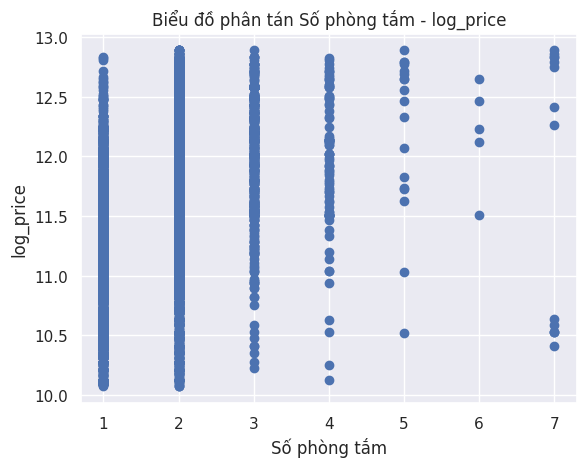

In [ ]:
# Lấy các giá trị của trường PhongTam và log_price
phongtam = frame['PhongTam']
log_price = frame['log_price']

# Vẽ biểu đồ scatter
plt.scatter(phongtam, log_price)
plt.xlabel('Số phòng tắm')
plt.ylabel('log_price')
plt.title('Biểu đồ phân tán Số phòng tắm - log_price')
plt.show()

Dựa trên biểu đồ phân tán Số phòng tắm - log_price, ta có thể nhận thấy một mối quan hệ tương đối tuyến tính giữa số phòng tắm và log của giá chung cư. Các điểm dữ liệu trên biểu đồ phân tán có xu hướng tăng dần khi số phòng tắm tăng, cho thấy số phòng tắm lớn hơn thường đi kèm với log_price cao hơn.

- Câu5 :có bao nhiêu số lượng căn hộ qua các quận?

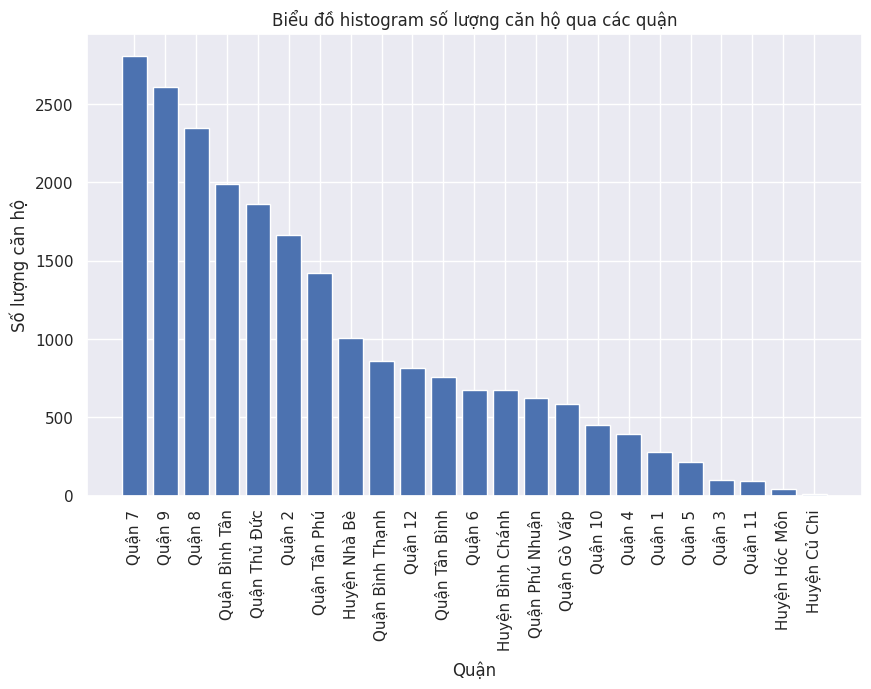

In [ ]:
# Trích xuất thông tin về giá và quận
prices = frame['Gia']

# Tạo một DataFrame mới để chứa thông tin về giá và quận
dt = pd.DataFrame({'Gia': prices})

# Tính tổng số lượng căn hộ trong mỗi quận
quans = frame['Quan']
count_by_quan = quans.value_counts()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.bar(count_by_quan.index, count_by_quan.values)
plt.xlabel('Quận')
plt.ylabel('Số lượng căn hộ')
plt.title('Biểu đồ histogram số lượng căn hộ qua các quận')
plt.xticks(rotation=90)
plt.show()

Câu 6: số lượng căn hộ trong các quận có giá cao nhất?

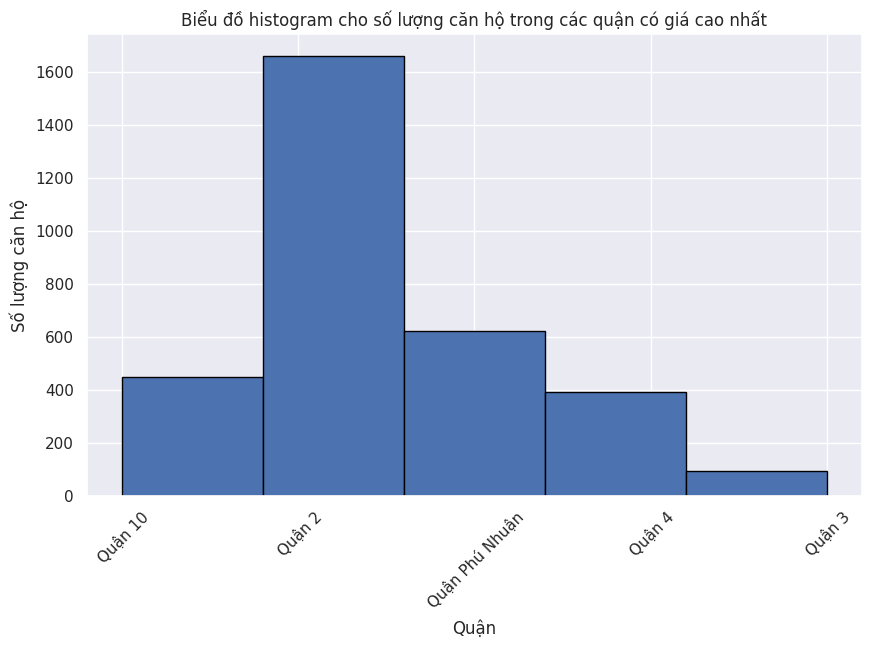

In [ ]:
import matplotlib.pyplot as plt

# Tính trung bình giá căn hộ của từng quận
average_prices = frame.groupby('Quan')['Gia'].mean()

# Sắp xếp các quận theo giá trung bình giảm dần
sorted_quans = average_prices.sort_values(ascending=False)

# Lấy top 5 quận có giá trung bình cao nhất
top_quans = sorted_quans.head(5)

# Lọc dữ liệu để chỉ bao gồm các quận có trong top 5
frame_top_quans = frame[frame['Quan'].isin(top_quans.index)]

# Vẽ biểu đồ histogram cho số lượng căn hộ trong từng quận
plt.figure(figsize=(10, 6))
plt.hist(frame_top_quans['Quan'], bins=len(top_quans), edgecolor='black')
plt.xlabel('Quận')
plt.ylabel('Số lượng căn hộ')
plt.title('Biểu đồ histogram cho số lượng căn hộ trong các quận có giá cao nhất')
plt.xticks(rotation=45)
plt.show()


Câu 7; số lượng căn hộ trong các quận có giá thấp nhất

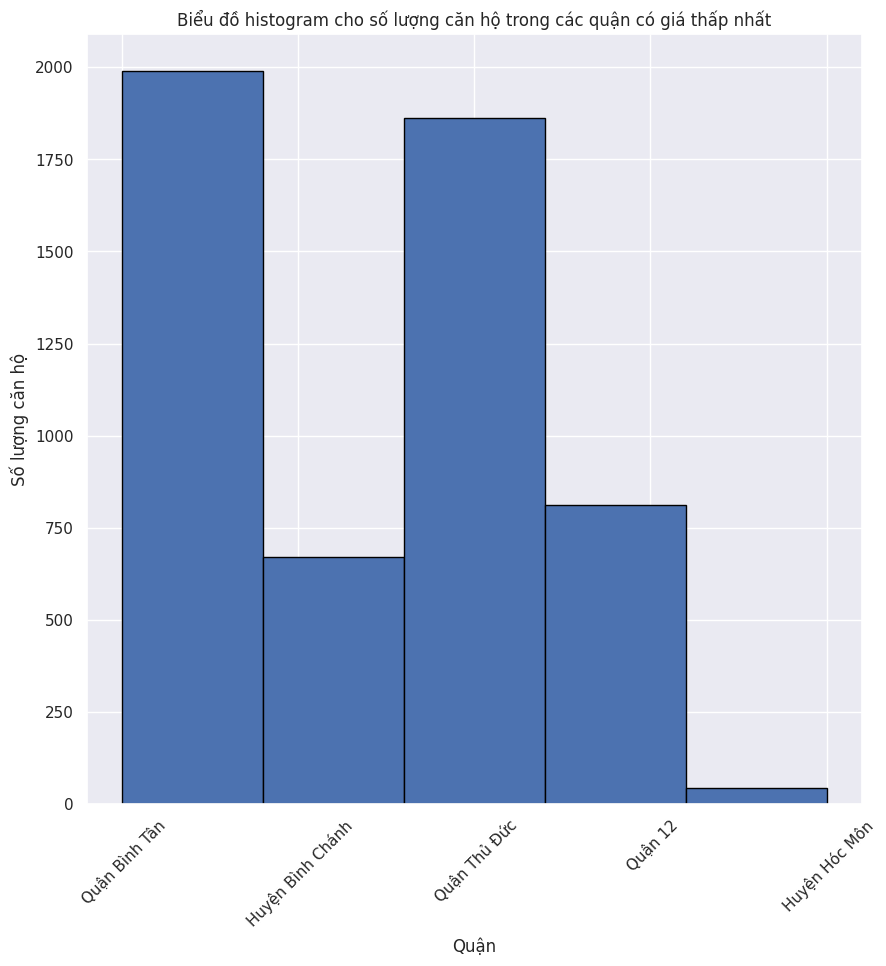

In [ ]:
# Tính trung bình giá căn hộ của từng quận
average_prices = frame.groupby('Quan')['Gia'].mean()

# Sắp xếp các quận theo giá trung bình tăng dần
sorted_quans = average_prices.sort_values()

# Lấy top 5 quận có giá trung bình thấp nhất
bottom_quans = sorted_quans.head(5)

# Lọc dữ liệu để chỉ bao gồm các quận có trong top 5
frame_bottom_quans = frame[frame['Quan'].isin(bottom_quans.index)]

# Vẽ biểu đồ histogram cho số lượng căn hộ trong từng quận
plt.figure(figsize=(10, 10))
plt.hist(frame_bottom_quans['Quan'], bins=len(bottom_quans), edgecolor='black')
plt.xlabel('Quận')
plt.ylabel('Số lượng căn hộ')
plt.title('Biểu đồ histogram cho số lượng căn hộ trong các quận có giá thấp nhất')
plt.xticks(rotation=45)
plt.show()

In [ ]:
frame1 = frame[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong','DacDiem','Gia','USD']]
bins = [42,67917,106250,40833333] #Mục đích của việc chia thành các nhóm là để phân loại và phân phối dữ liệu vào các khoảng giá trị khác nhau, có thể được sử dụng để tạo ra biểu đồ histogram hoặc biểu đồ khác để trực quan hóa dữ liệu

In [ ]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('house Range vs Price')
    plt.show()

câu 8: so sánh giá chung cư đã được bàn giao với chưa đc bàn giao


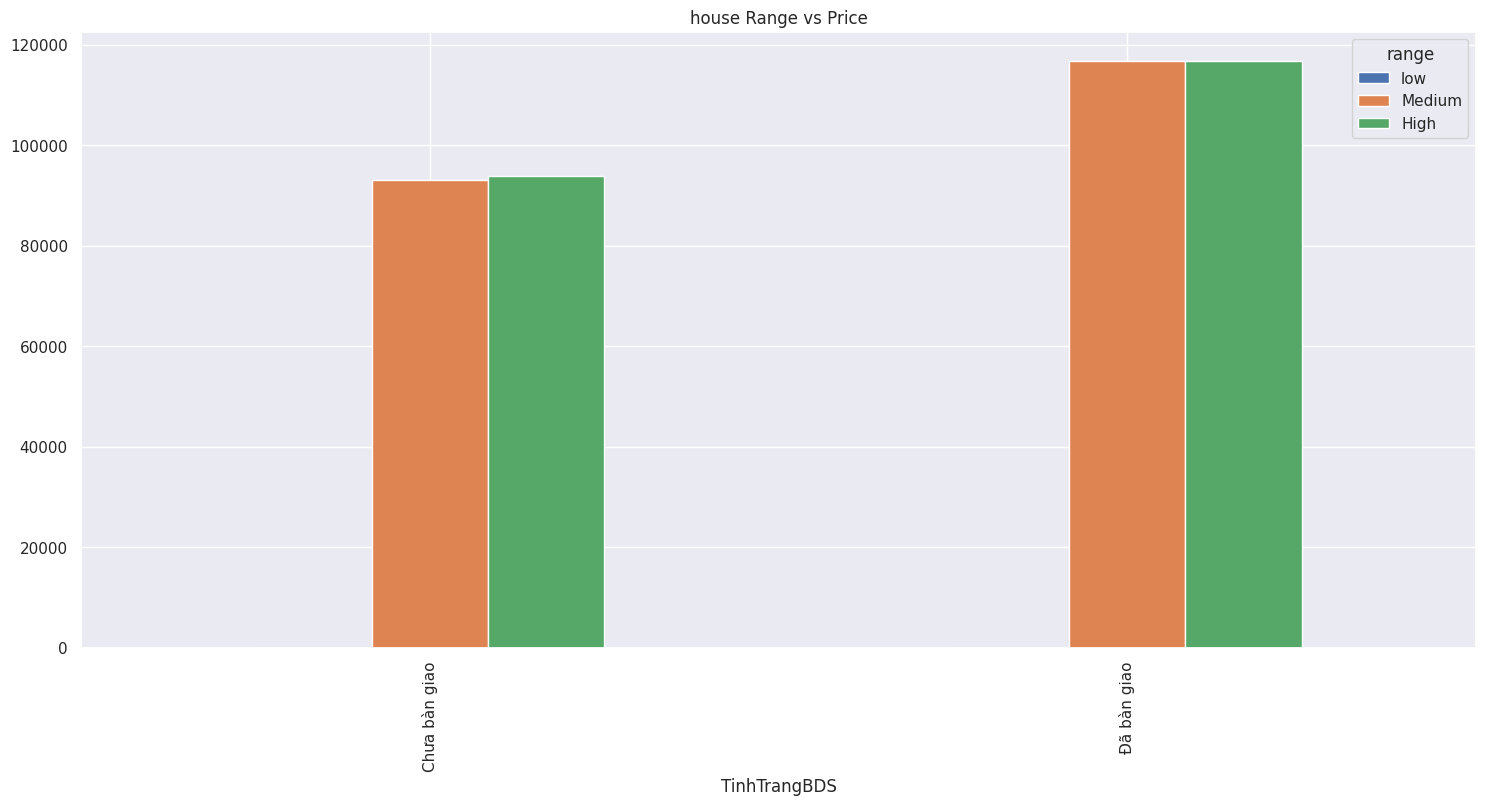

In [ ]:
Analyst('TinhTrangBDS')

Có thể thấy những chung cư đã được bàn giao có giá **cao hơn** so với chưa được bàn giao

câu 9: những kiểu nội thất được ưa chuộng trong những khu căn hộ chung cư giá cao


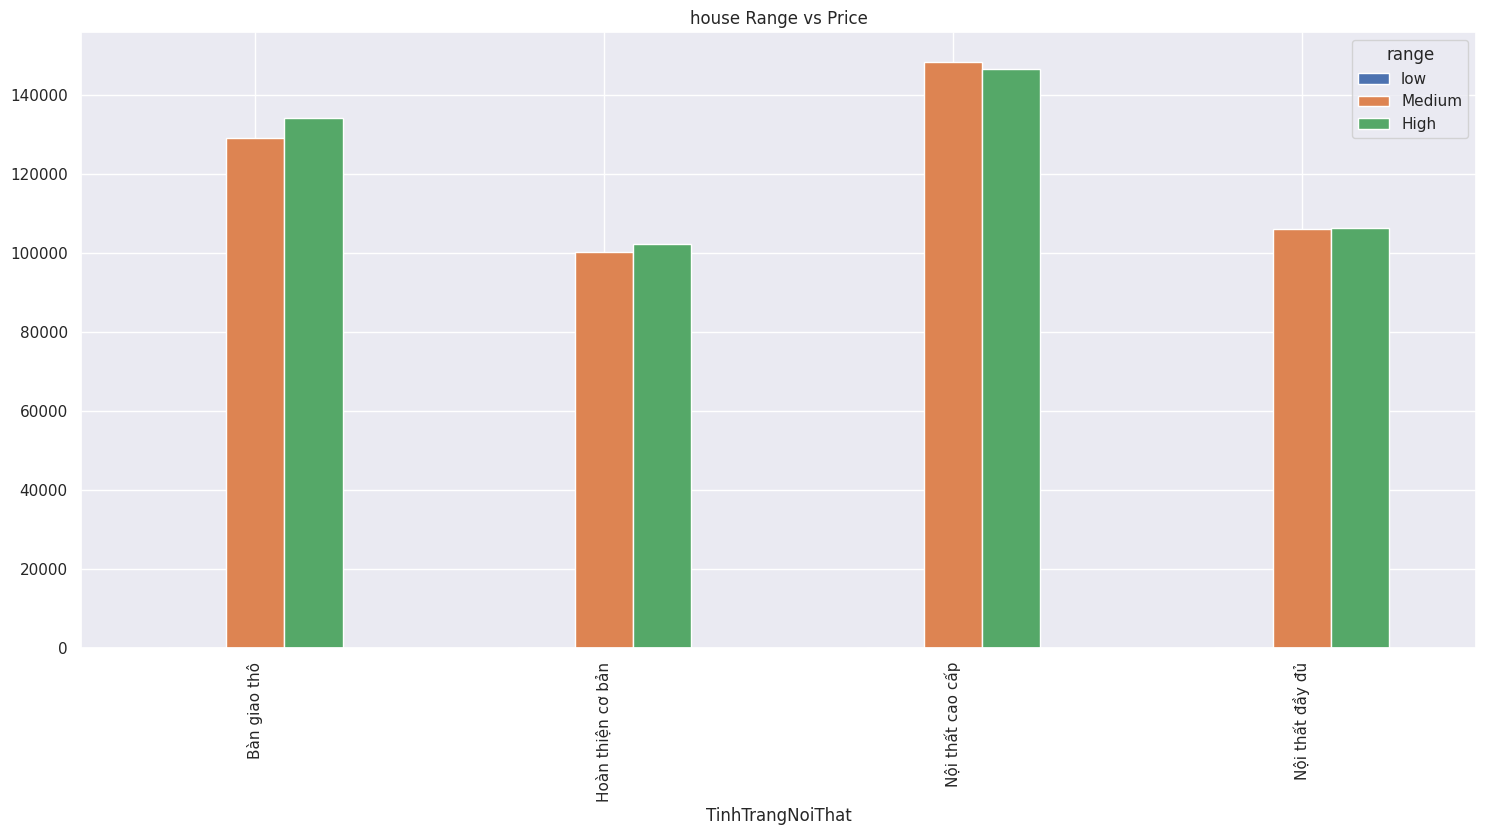

In [ ]:
Analyst('TinhTrangNoiThat')

Nội thất được bàn giao thô được ưa chuộng trong những khu căn hộ với giá cao

Câu 10

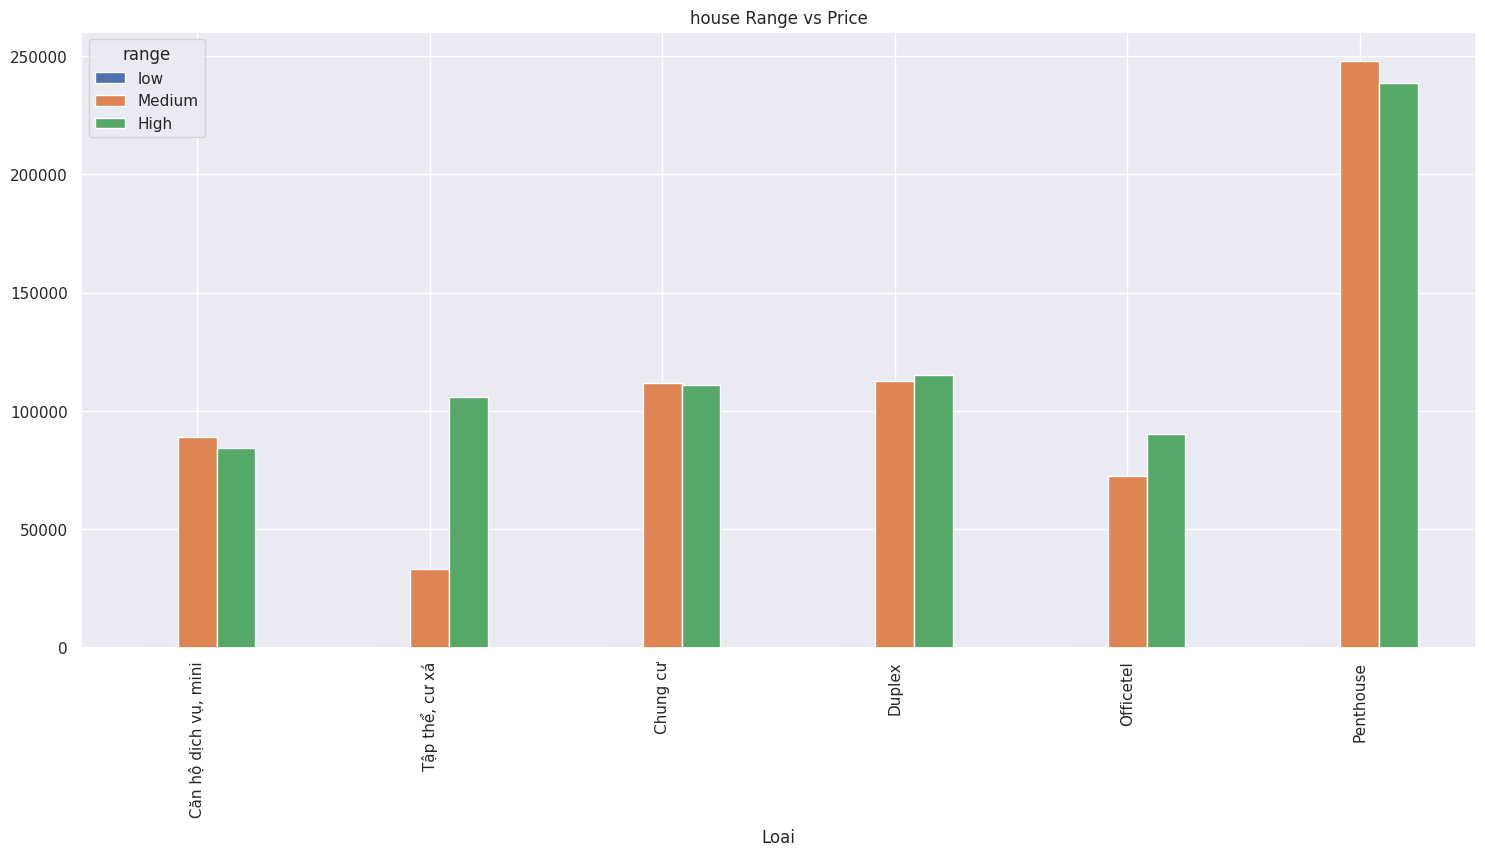

In [ ]:
Analyst('Loai')

Những căn chung cư có giá trung bình đến cao thường là penthouse

Câu 11

Dòng mã test = frame1[frame1.USD < frame1.USD.quantile(0.8)] thực hiện việc lọc các dòng trong DataFrame frame1 mà giá trị của cột 'USD' nhỏ hơn giá trị quantile 0.8 của cột 'USD'.

frame1.USD.quantile(0.8) tính toán quantile 0.8 của cột 'USD' trong DataFrame frame1, tức là giá trị mà 80% các giá trị của cột 'USD' nằm dưới.
frame1[frame1.USD < frame1.USD.quantile(0.8)] lọc các dòng trong DataFrame frame1 mà giá trị của cột 'USD' nhỏ hơn quantile 0.8 đã tính toán.

In [ ]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

Đông Nam    1552
Đông         823
Tây Nam      767
Đông Bắc     707
Bắc          679
Tây          623
Tây Bắc      575
Nam          529
Name: HuongBanCong, dtype: int64


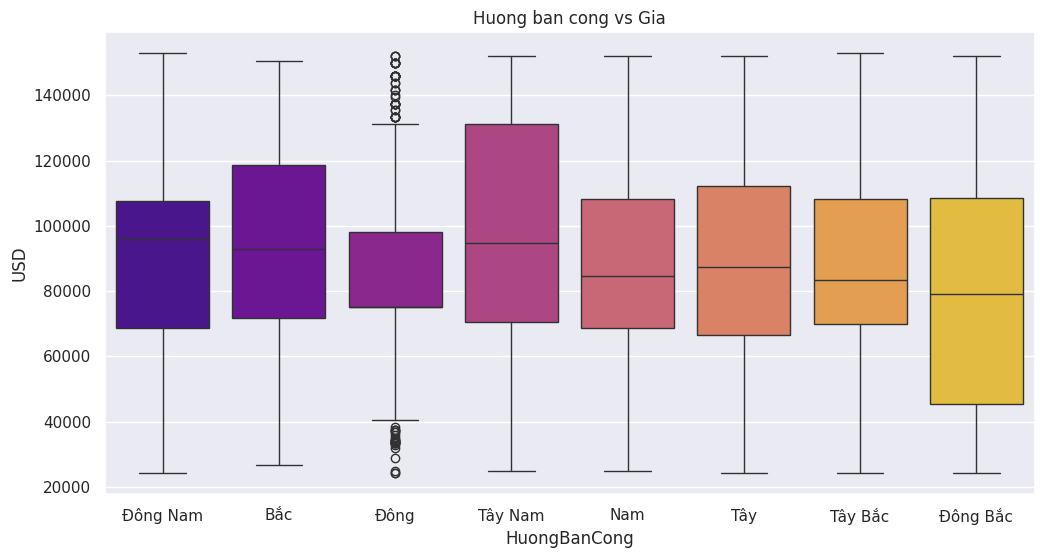

Đông Nam    1317
Tây Bắc     1222
Nam          971
Đông Bắc     868
Đông         712
Tây Nam      596
Tây          459
Bắc          419
Name: HuongCuaChinh, dtype: int64


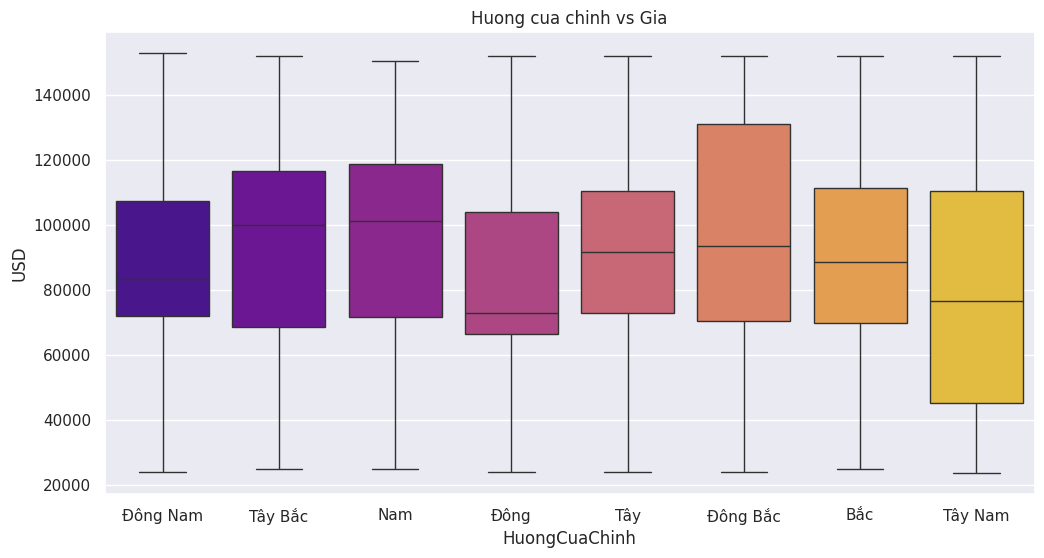

Chung cư                 16773
 Căn hộ dịch vụ, mini      418
Officetel                  342
Duplex                     170
Penthouse                   58
 Tập thể, cư xá             41
Name: Loai, dtype: int64


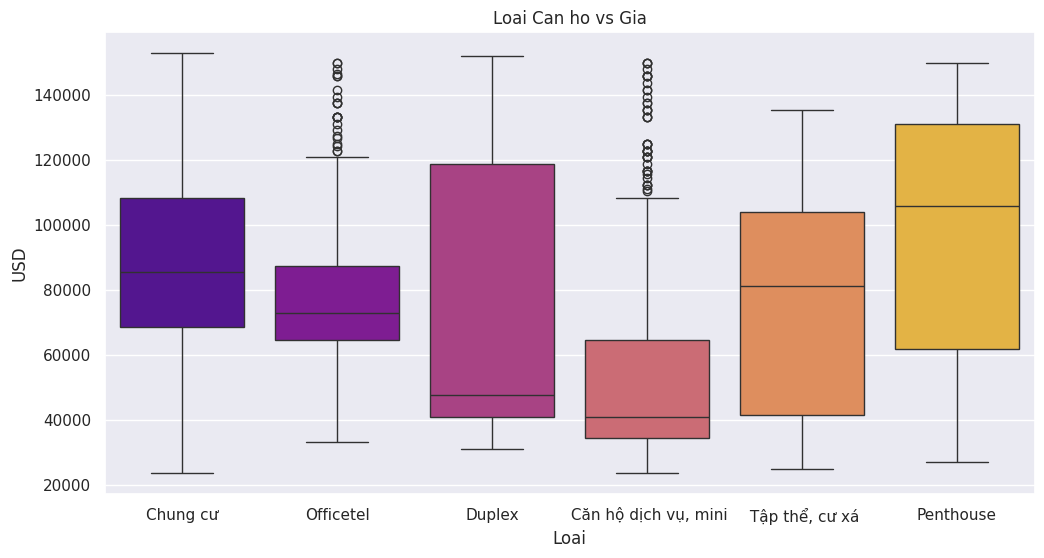

Đã có sổ        6195
Đang chờ sổ     5694
Giấy tờ khác    1390
Name: GiayTo, dtype: int64


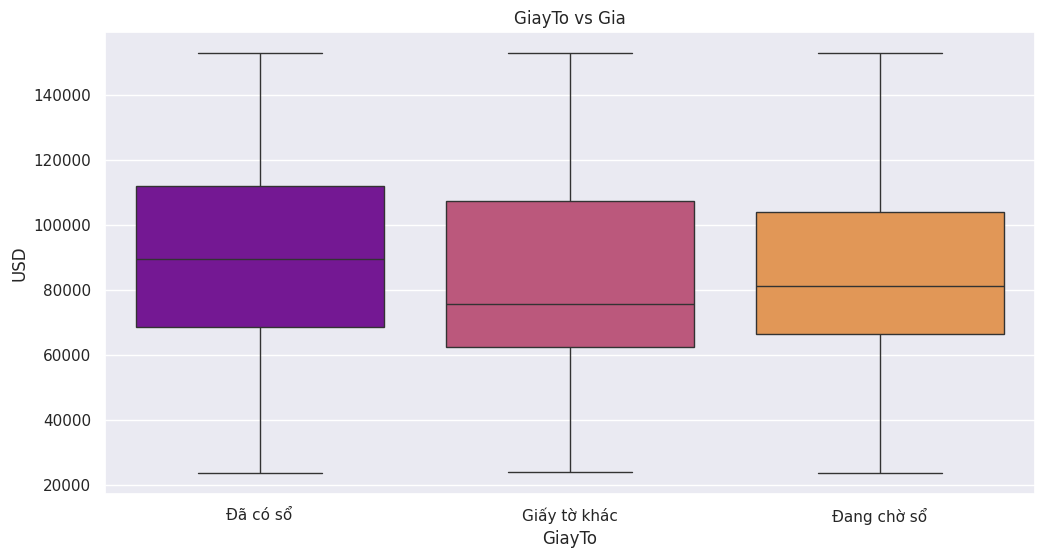

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai Can ho vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Gia')
plt.show()

Có thể thấy trường dữ liệu giấy tờ không ảnh hưởng quá nhiều tới giá nhà

Câu 12: Loại căn hộ nào phổ biến nhất

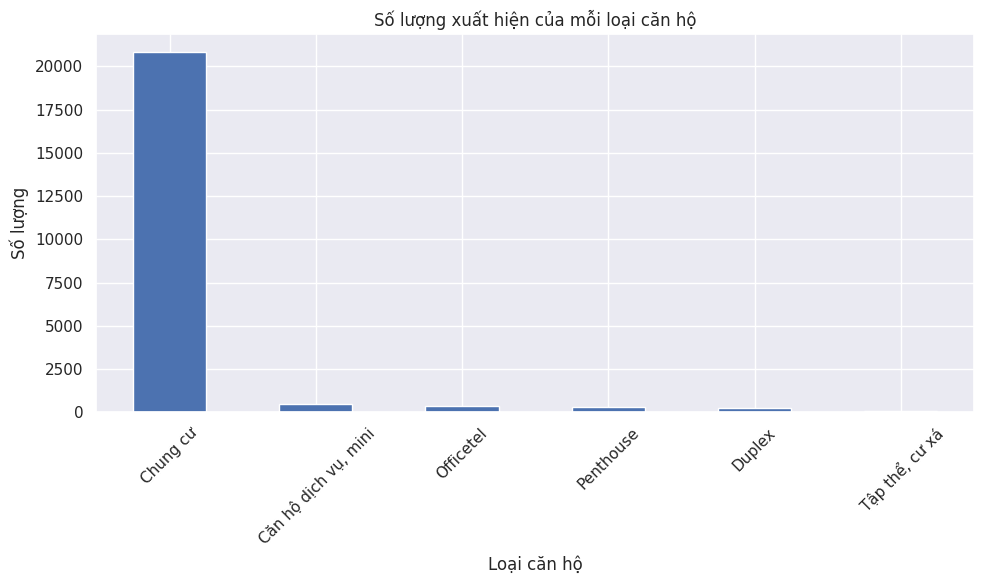

In [ ]:
# Đếm số lượng xuất hiện của mỗi loại căn hộ
type_counts = frame['Loai'].value_counts()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Số lượng xuất hiện của mỗi loại căn hộ')
plt.xlabel('Loại căn hộ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Tinh chỉnh layout
plt.show()

câu 13: Hướng cửa chính phổ biến nhất là gì?

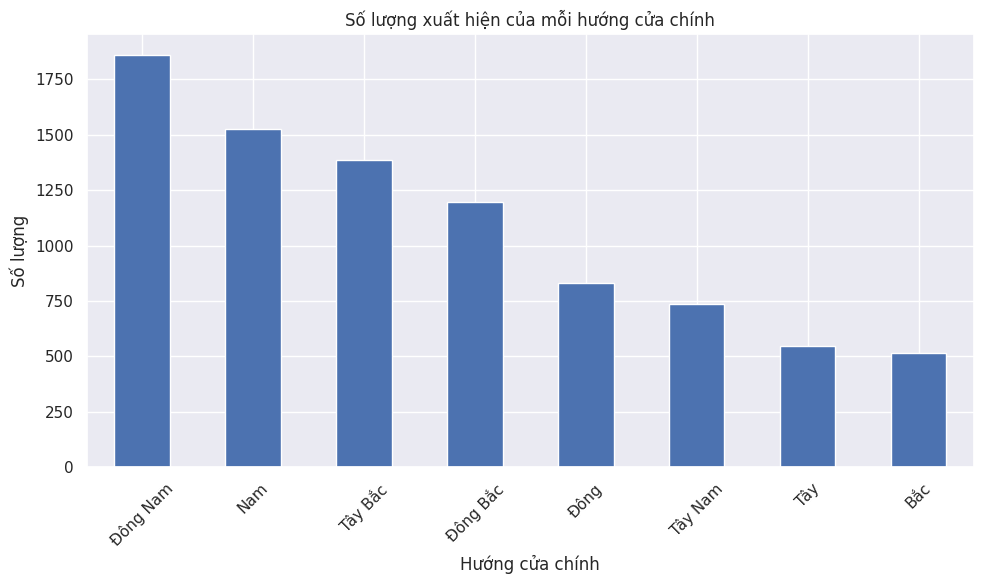

Hướng cửa chính phổ biến nhất là: Đông Nam


In [ ]:
# Đếm số lượng xuất hiện của mỗi hướng cửa chính
door_direction_counts = frame['HuongCuaChinh'].value_counts()

# Xác định hướng cửa chính phổ biến nhất
most_common_door_direction = door_direction_counts.idxmax()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
door_direction_counts.plot(kind='bar')
plt.title('Số lượng xuất hiện của mỗi hướng cửa chính')
plt.xlabel('Hướng cửa chính')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Tinh chỉnh layout
plt.show()

print("Hướng cửa chính phổ biến nhất là:", most_common_door_direction)

câu 14 Phân bố giá của căn hộ như thế nào?

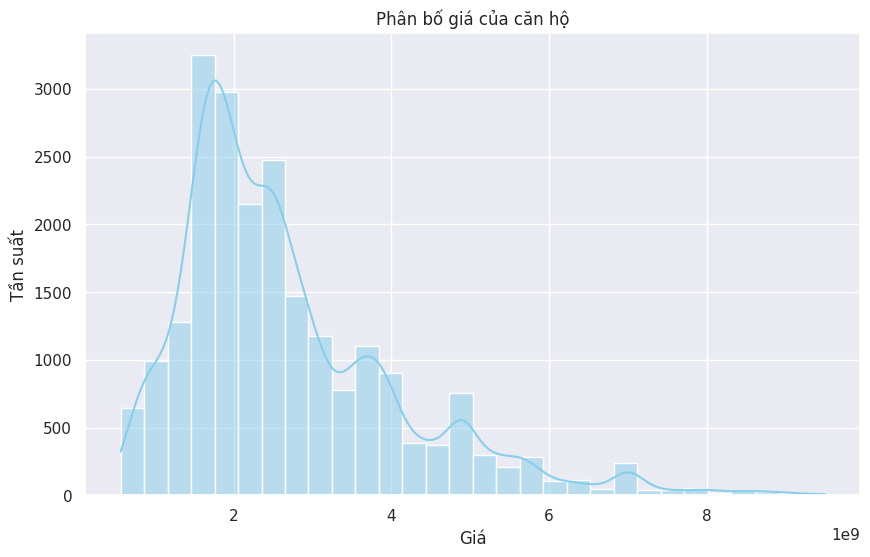

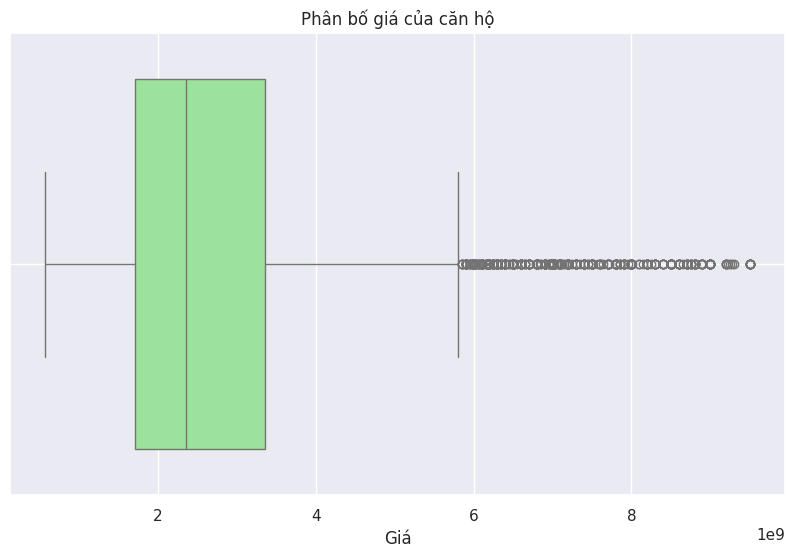

In [ ]:
# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(frame['Gia'], bins=30, kde=True, color='skyblue')
plt.title('Phân bố giá của căn hộ')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=frame['Gia'], color='lightgreen')
plt.title('Phân bố giá của căn hộ')
plt.xlabel('Giá')
plt.grid(True)
plt.show()

Histogram:

Phân phối giá của căn hộ không đồng đều, có thể có sự tập trung mạnh ở một số khoảng giá cụ thể.
Dữ liệu có thể bị lệch (skewed), với một số giá trị cao tập trung ở phần đuôi bên phải của phân phối.
Boxplot:

Boxplot cho thấy phân phối của giá căn hộ tập trung chủ yếu vào một khoảng giá có giá trị trung vị (median).
Có một số giá trị ngoại biên (outliers) ở phía trên của biểu đồ, cho thấy sự biến động lớn trong giá của một số căn hộ.
Nhìn chung, dựa trên hai biểu đồ này, có thể kết luận rằng phân bố giá của căn hộ có sự không đồng đều và có sự biến động lớn, đồng thời cũng có sự tập trung ở một số khoảng giá cụ thể. Điều này có thể phản ánh sự đa dạng trong thị trường bất động sản và yếu tố khác nhau ảnh hưởng đến giá của các căn hộ.

câu 15 Loại giấy tờ pháp lý thông dụng cho bất động sản là gì?

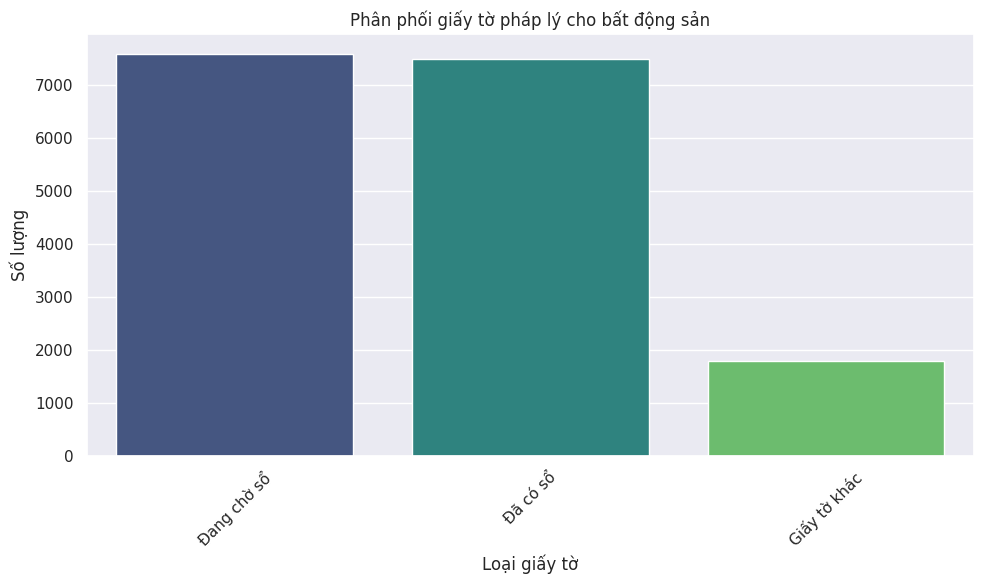

In [ ]:
# Đếm số lượng xuất hiện của mỗi loại giấy tờ pháp lý
paper_counts = frame['GiayTo'].value_counts()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=paper_counts.index, y=paper_counts.values, palette="viridis")
plt.title('Phân phối giấy tờ pháp lý cho bất động sản')
plt.xlabel('Loại giấy tờ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Tinh chỉnh layout
plt.show()

câu 16 Tình trạng nội thất cao cấp xuất hiện ở những bất động sản nào?

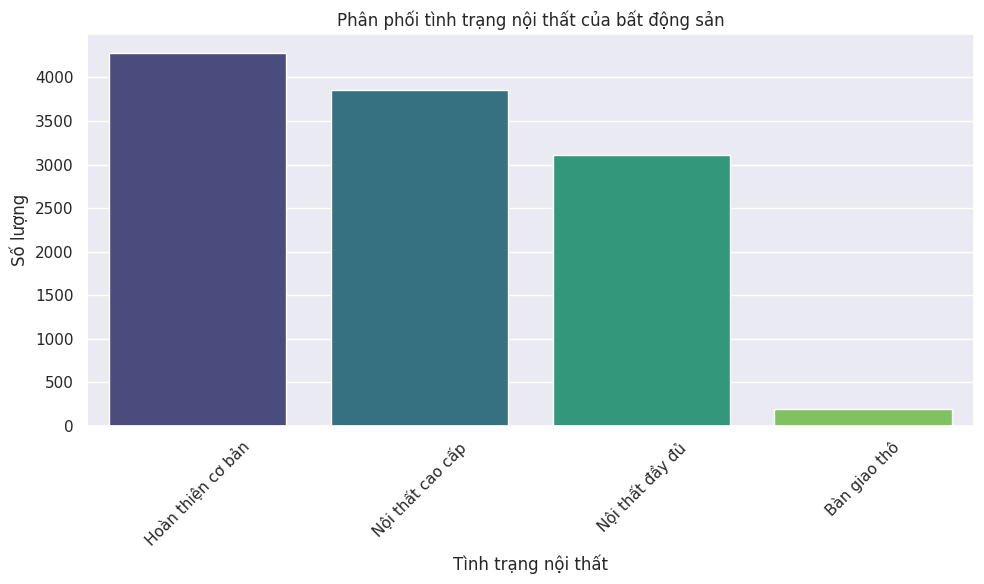

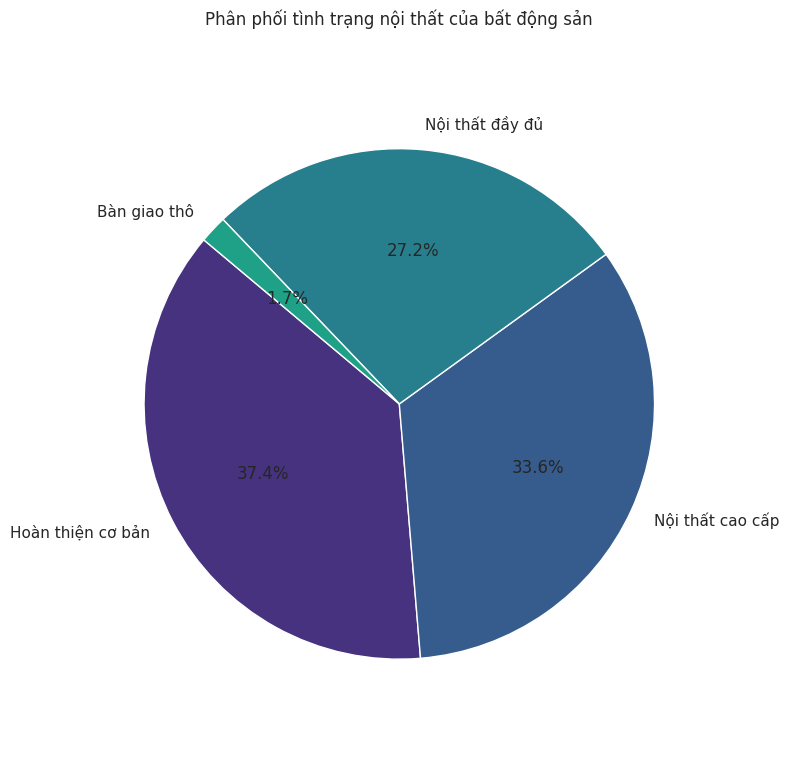

In [ ]:
# Đếm số lượng xuất hiện của mỗi loại tình trạng nội thất
interior_counts = frame['TinhTrangNoiThat'].value_counts()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=interior_counts.index, y=interior_counts.values, palette="viridis")
plt.title('Phân phối tình trạng nội thất của bất động sản')
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ pie chart
plt.figure(figsize=(8, 8))
plt.pie(interior_counts, labels=interior_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Phân phối tình trạng nội thất của bất động sản')
plt.axis('equal')
plt.tight_layout()
plt.show()

 câu 17 Có bao nhiêu bất động sản chưa được bàn giao?

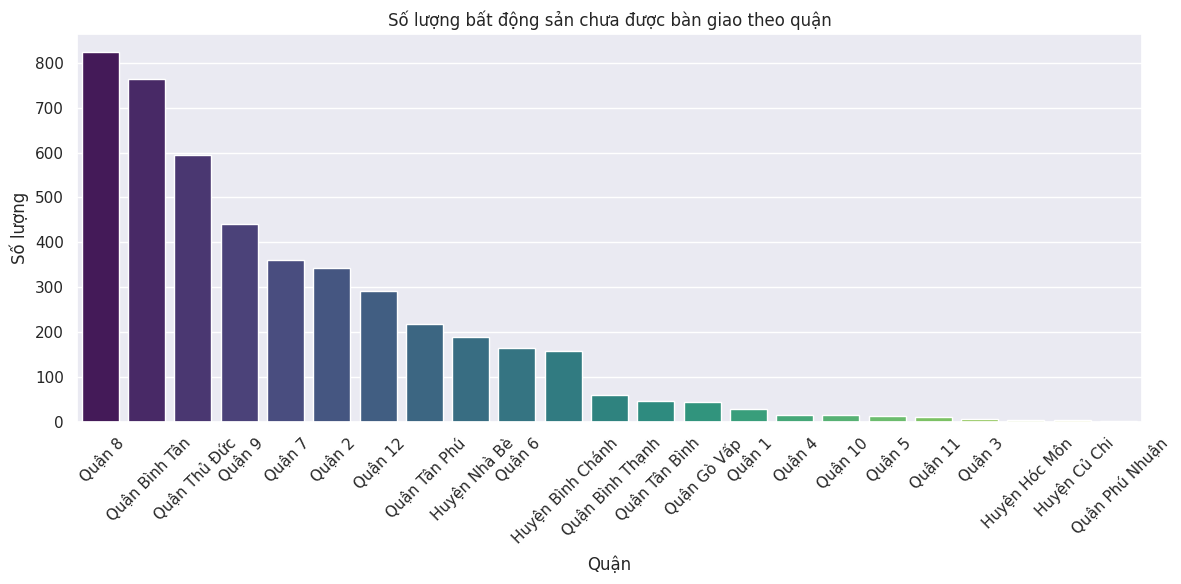

In [ ]:
# Lọc bất động sản chưa được bàn giao
properties_not_delivered = frame[frame['TinhTrangBDS'] == 'Chưa bàn giao']

# Đếm số lượng bất động sản chưa được bàn giao theo từng quận hoặc khu vực khác
not_delivered_counts = properties_not_delivered['Quan'].value_counts()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=not_delivered_counts.index, y=not_delivered_counts.values, palette="viridis")
plt.title('Số lượng bất động sản chưa được bàn giao theo quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

câu 18 hướng ra ban công phổ biến nhất

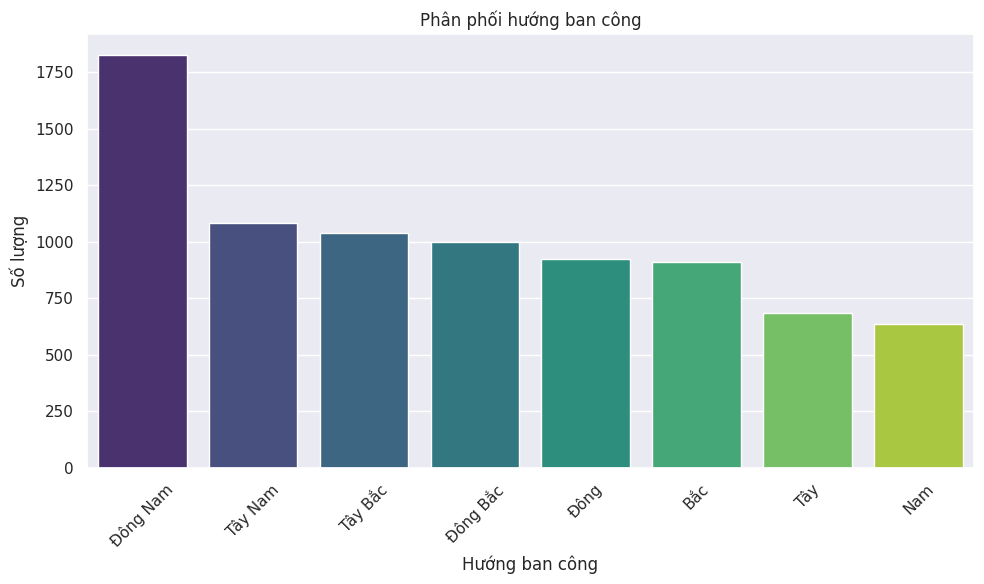

Hướng ban công phổ biến nhất là: Đông Nam


In [ ]:
# Đếm số lượng xuất hiện của mỗi hướng ban công
balcony_direction_counts = frame['HuongBanCong'].value_counts()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=balcony_direction_counts.index, y=balcony_direction_counts.values, palette="viridis")
plt.title('Phân phối hướng ban công')
plt.xlabel('Hướng ban công')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Tinh chỉnh layout
plt.show()

# Xác định hướng ban công phổ biến nhất
most_common_balcony_direction = balcony_direction_counts.idxmax()
print("Hướng ban công phổ biến nhất là:", most_common_balcony_direction)

câu 19

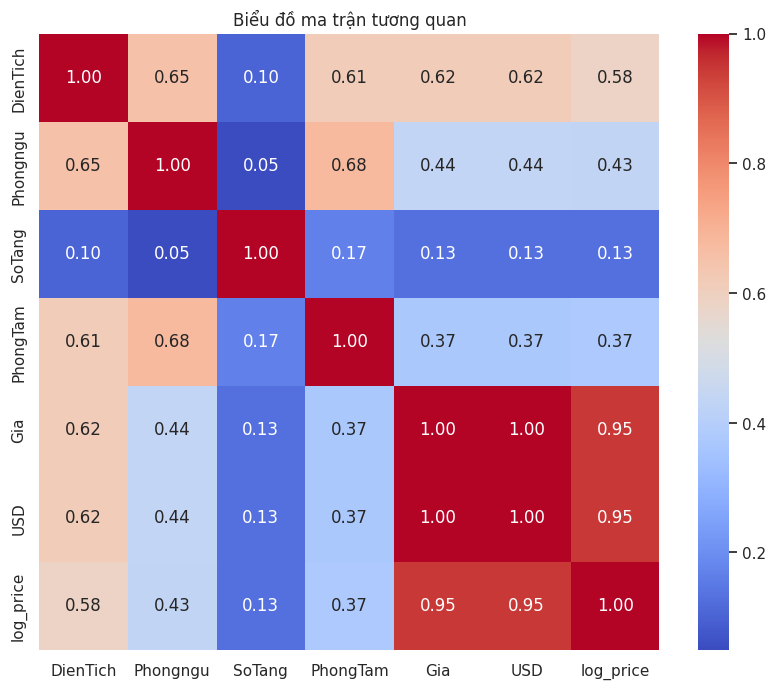

In [ ]:
# Tạo ma trận tương quan
correlation_matrix = frame.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ ma trận tương quan')
plt.show()

giá trị trung binh của các loại căn trung cư ở các quận

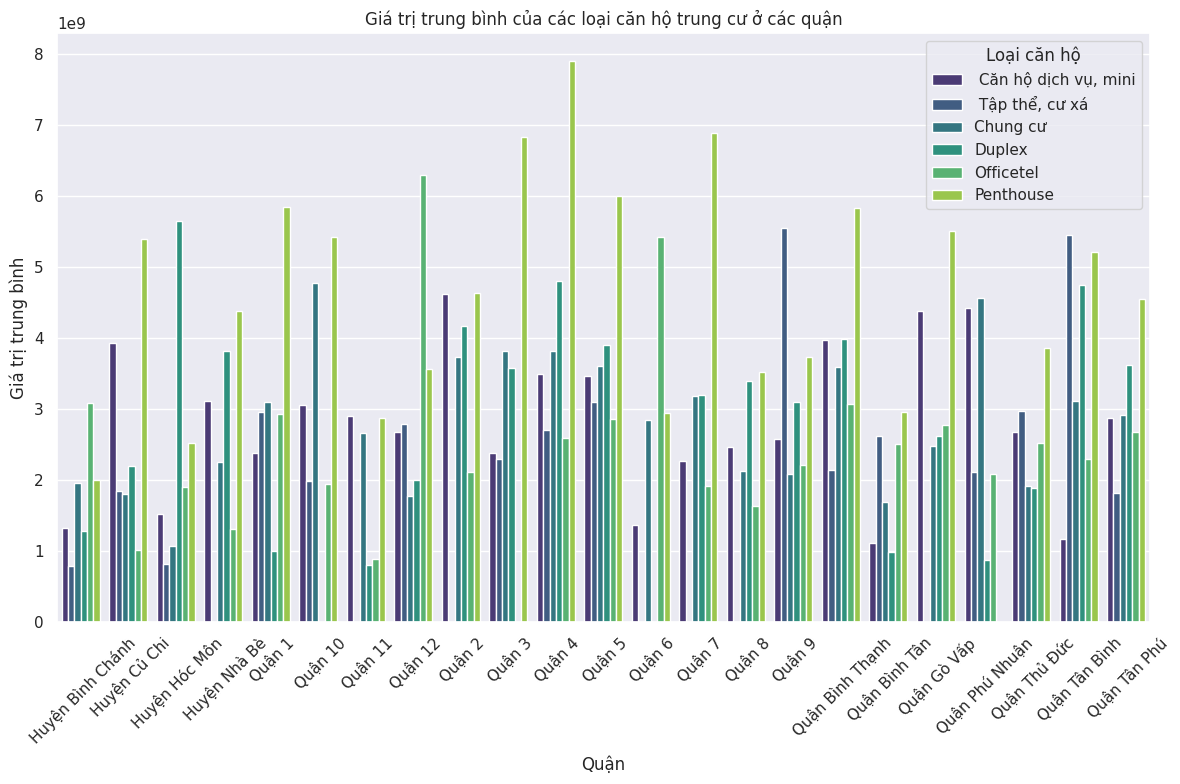

In [ ]:
# Tính giá trị trung bình của các loại căn hộ trung cư ở các quận
avg_price_by_district = frame.groupby(['Quan', 'Loai'])['Gia'].mean().reset_index()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Quan', y='Gia', hue='Loai', data=avg_price_by_district, palette='viridis')
plt.title('Giá trị trung bình của các loại căn hộ trung cư ở các quận')
plt.xlabel('Quận')
plt.ylabel('Giá trị trung bình')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.legend(title='Loại căn hộ')
plt.tight_layout()  # Tinh chỉnh layout
plt.show()
